# US States Covid-19 Analysis

## Summary

We analyze the US states data for COVID-19 infection rates and observe that there is a negative correlation between number of clear days and infection rates.

## Analysis

Import modules and ingest the data.

In [1]:
# Hy Magic 
from IPython.core.magic import register_line_cell_magic
@register_line_cell_magic
def h(line, cell=None):
    import hy; code = (line or "") + (cell or "")
    return hy.eval(hy.read_str("(do\n" + code + "\n)\n"), globals())
del h

In [2]:
%%h
(import [pandas :as pd])
(import [pandasql [sqldf]])
(import [numpy :as np])
(import [scipy.stats :as stats])
(import [matplotlib.pyplot :as plt]) 
(import warnings) (warnings.filterwarnings "ignore")
(setv pd.options.display.width 0)
(defn pd-read-tsv [file] (pd.read-csv file :delimiter "\t")) 
(defn pd-sql [query] (sqldf query (globals)))

In [3]:
%h (setv df1 (pd-read-tsv "state-data.tsv")) (df1.head)

,States,Cases,% Sun,Total Hours,Clear Days,Population,Avg °F
0,Alabama,0,58,2641,99,4903185,62.8
1,Alaska,0,41,2061,61,731545,26.6
2,Arizona,5,85,3806,193,7278717,60.3
3,Arkansas,0,61,2771,123,3017804,60.4
4,California,110,68,3055,146,39512223,59.4


Scale cases per state by population. Drop states with zero cases.

In [4]:
%%h 
(setv df2 
  (sqldf (+ "SELECT *, (0.0 + Cases)/Population * 1000 * 1000 as CaseDensity " 
            "FROM df1 WHERE CaseDensity > 0.0")))
(df2.head)

,States,Cases,% Sun,Total Hours,Clear Days,Population,Avg °F,CaseDensity
0,Arizona,5,85,3806,193,7278717,60.3,0.686934
1,California,110,68,3055,146,39512223,59.4,2.783949
2,Colorado,8,71,3204,136,5758736,45.1,1.389194
3,Connecticut,5,56,2585,82,3565287,49.0,1.402412
4,Florida,6,66,2927,101,21477737,70.7,0.279359


Let's look at the correlations.

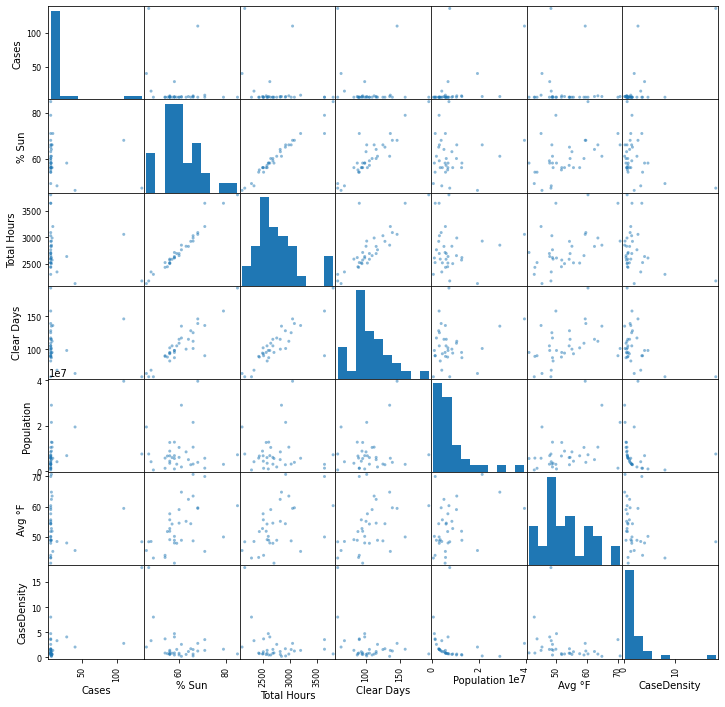

In [5]:
%h (pd.plotting.scatter_matrix df2 :figsize (, 12 12)) (plt.show)

In [6]:
%h (-> df2 (.corr) (display))

,Cases,% Sun,Total Hours,Clear Days,Population,Avg °F,CaseDensity
Cases,1.000000,-0.201227,-0.197791,-0.144449,0.461537,-0.053017,0.707839
% Sun,-0.201227,1.000000,0.973611,0.892822,0.053677,0.487677,-0.368554
Total Hours,-0.197791,0.973611,1.000000,0.815286,0.010445,0.489860,-0.307479
Clear Days,-0.144449,0.892822,0.815286,1.000000,0.180635,0.374306,-0.420335
Population,0.461537,0.053677,0.010445,0.180635,1.000000,0.378348,-0.147516
Avg °F,-0.053017,0.487677,0.489860,0.374306,0.378348,1.000000,-0.266432
CaseDensity,0.707839,-0.368554,-0.307479,-0.420335,-0.147516,-0.266432,1.000000


Notice that the correlation between CaseDensity and Clear Days is -0.42. 

Let us now see the p-value of this correlation.

In [7]:
%h (stats.pearsonr (get df2 "CaseDensity") (get df2 "Clear Days"))

(-0.42033532554948233, 0.013318245638902295)

The p-value is low. This indicates that there is a statistically significant correlation between Clear Days and infection rates.

## Data Sources


Data | Source
---- | ------
COVID data | <https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-08-2020.csv>
Population by state | <https://www.census.gov/data/datasets/time-series/demo/popest/2010s-national-total.html>
Sunshine by state | <https://www.currentresults.com/Weather/US/average-annual-state-sunshine.php>
Temperature by state | <https://www.currentresults.com/Weather/US/average-annual-state-temperatures.php>